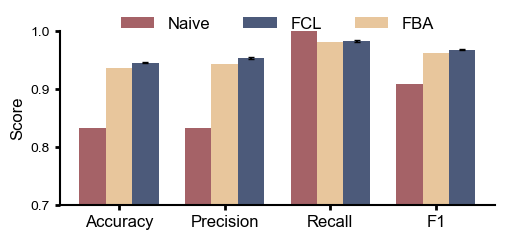

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colormaps as cmaps
import matplotlib

# Set font settings
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Generate manual color palette from lipari colormap
red = cmaps.lipari[128].colors
yellow = cmaps.lipari[225].colors
blue = cmaps.lipari[60].colors
colors = [red, yellow, blue]

# Read and separate data by model type
df = pd.read_csv('fig2ab.csv')
rf_data = df[df['label'] == 'Random Forest']
fba_data = df[df['label'] == 'FBA']
naive_data = df[df['label'] == 'Naive']

# Define metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Compute mean and standard error for Random Forest (multiple runs)
rf_means = rf_data[metrics].mean()
rf_stds = rf_data[metrics].sem()

# Get single values for FBA and Naive (single run)
fba_values = fba_data[metrics].iloc[0]
naive_values = naive_data[metrics].iloc[0]

# Set up plot parameters
x = np.arange(len(metrics))
width = 0.25  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(5.23, 2.54))

# Plot bars for each model
ax.bar(x - width, naive_values, width, label='Naive', color=red)
ax.bar(x + width, rf_means, width, yerr=rf_stds, capsize=2, label='FCL', color=blue)
ax.bar(x, fba_values, width, label='FBA', color=yellow)

# Set x-axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim([0.7, 1])

# Add labels and customize appearance
ax.set_ylabel("Score", fontsize=12)

# Remove top and right spines, thicken remaining spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Customize tick parameters
ax.xaxis.set_tick_params(width=2, labelsize=12)
ax.yaxis.set_tick_params(width=2, labelsize=10)

# Adjust x-tick labels and legend
plt.xticks(rotation=0, ha="center")
legend = plt.legend(ncols=3, loc='upper center', bbox_to_anchor=(0.5, 1.17), fontsize=12)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_linewidth(0.0)

# Adjust layout and display plot
plt.tight_layout()
plt.show()